 ---
 # Prática 3: Análisis en el dominio de la frecuencia, del circuito de primer orden RC serie.
 ---
> Autores: Jorge del Río López, Carlos González García y Javier Rodríguez Urbano.
>
> Fecha: 2024-10-29
>
> Curso 24-45 
---
<div style="text-align: center;">
    <img src="https://i.pinimg.com/736x/e8/6c/d4/e86cd4446daa867f88666c90ec10b0d4.jpg" alt="Logo" style="width: 20%;"/>
</div>


In [31]:
import pandas as pd
import math
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy import signal
Pi = 3.141592653589793

In [32]:
xlsx_name="P3_PlantillaMedidasEstudiantes.ods" #Importamos el fichero que contiene los datos.

In [33]:
#Creamos una funcion para convertir n listas en arrays.
def ConverArray3 (lista,lista2,lista3):
    return np.array(lista), np.array(lista2),np.array(lista3)
def ConverArray2 (lista,lista2):
    return np.array(lista), np.array(lista2)

def ErrorRelativo(exp,teor):
    return (abs(exp - teor)/abs(teor))*100

---
<h1 style="text-align: center;">[P3.C1]</h1>

---
Tenemos las siguientes funciones de transferencia:

$\~{T_C}\ =\ \dfrac{\~{V_C}(f)}{\~{V_s}(f)}\ =\ \dfrac{1}{1+ j\omega RC},$

$\~{T_R}\ =\ \dfrac{\~{V_R}(f)}{\~{V_s}(f)}\ =\ \dfrac{j\omega RC}{1+ j\omega RC}.$


De ellas obtenemos el módulo y el argumento; para el módulo calculamos el módulo de cada número de la fracción y obtenemos las expresiones que se muestran más abajo, la fase se calcula usando la fórmula del argumento: 


$ \~{T_C} = \left\{ \begin{array}{lr} |\~{T_C}| = \dfrac{1}{\sqrt{R^2C^2\omega^2\ +\ 1}}  & Módulo\\ \Phi\ =\ atan(-\omega RC) & Argumento \end{array} \right. $

$\~{T_R}= \left\{ \begin{array}{lr} |\~{T_R}| = RC\omega\ \sqrt{\dfrac{1}{R^2C^2\omega^2\ +\ 1}} & Módulo\\ \Phi\ =\ atan(\dfrac{1}{\omega RC}) & Argumento\end{array} \right. $

---
<h1 style="text-align: center;">[P3.C2]</h1>

---

Primero medimos los valores de las resistencias y los condensadores con las que vamos a trabajar.

In [34]:
#Extraemos los valores de las resistencias.
DatosResistenciaCondensador = pd.read_excel(xlsx_name,sheet_name='P3C2',usecols='A:B')
Rmedida=DatosResistenciaCondensador["R"].tolist()
CMedida=DatosResistenciaCondensador["C"].tolist()

print(f'Las medidas de las resistencias y las capacidades son: \nR Teorico: {Rmedida[0]} Ohms   R Práctico: {Rmedida[1]} Ohms')
print(f'C Teorico: {CMedida[0]} F   C Práctico: {CMedida[1]} F')
Rmedida,Cmedida = ConverArray2(Rmedida,CMedida)


Las medidas de las resistencias y las capacidades son: 
R Teorico: 2200 Ohms   R Práctico: 2140 Ohms
C Teorico: 2.2e-08 F   C Práctico: 2.1949999999999998e-08 F


---
<h1 style="text-align: center;">[P3.C3]</h1>

---


In [35]:
DatosTarea1 = pd.read_excel(xlsx_name,sheet_name='P3C3',usecols='A:D')#Recogemos los datos del excel.

FrecuenciaExp = DatosTarea1["FreqHz"].tolist()
VoltajeFuente = DatosTarea1["Vfuente"].tolist()
VoltajeC = DatosTarea1["Vc"].tolist()
Fase = DatosTarea1["dt"].tolist()

---
<h1 style="text-align: center;">[P3.C4]</h1>

---


En este apartado nos encargaremos de mostrar los diagramas de Bode, además de ver la diferencia de los modulos de $\~{T_C}$ y $\~{T_R}$ experimental y teórico.

Expondremos los diagramas de Bode de $\~{T_C}$, tras este pondremos el de $\~{T_R}$, por último pondremos ambos en una misma gráfica para visualizarlos conjuntamente.


In [36]:
#Definimos las variables que usaremos en esta parte.

Tcexp = [] # Lista que tomara los valores del modulo de Tc para los valores experimentales.
Trexp = [] # Lista que tomara los valores del modulo de Tr para los valores experimentales.

Tcteo = [] # Lista que tomara los valores del modulo de Tc para los valores teóricos.
Trteo = [] # Lista que tomara los valores del modulo de Tr para los valores teóricos.
FrecTeo = [] # Lista que tomara los valores de la frecuencia teórica

EpsilonC = [] # Lista que tomara los valores del error relativo entre Tc exp y Tc teor
EpsilonR = [] # Lista que tomara los valores del error relativo entre Tr exp y Tr teor

FaseExpC = [] # Lista que tomara los valores de la fase experimental en el Condensador
FaseExpR = [] # Lista que tomara los valores de la fase experimental en la Resistencia
FaseTeoC = [] # Lista que tomara los valores de la fase teórica
FaseTeoR = [] # Lista que tomara los valores de la fase teórica

#### $\~{T_C}$
El módulo experimental de $\~{T_C}$ lo hemos calculado usando los valores medidos con el osciloscopio (el voltaje de la fuente y del condensador), para la fase experimental hemos usado la ecuación suministrada por el guión de prácticas ,que nos da, $\Delta\phi_i\ =\ 2\pi\ f\Delta t_i$.

Para los valores teóricos hemos usado las ecuaciones obtenidas en P3C1 para $\~{T_C}$.

#### $\~{T_R}$
Para obtener el módulo de $\~{T_R}$ hemos usado la ecuación $\~{V_s}\ =\ \~{V_C}\ +\ \~{V_R} $, que tras dividir entre $~{V_s}$ obtenemos las relación entre las funciones transferencia. Tras descomponer los fasores en el módulo por la fase obtenemos las dos ecuaciones:

$1\ =\ |\~{T_R}|\ cos(\Delta \phi _R)\ +\ |\~{T_C}|\ cos(\Delta \phi _C)$

$0\ =\ |\~{T_R}|\ sen(\Delta \phi _R)\ +\ |\~{T_C}|\ sen(\Delta \phi _C)$

Tras resolverlas obtenemos la expresion del módulo de $\~{T_R}$ y de la fase:

$\Delta \phi _R\ =\ atan(-\dfrac{|\~{T_C}|\ sen(\Delta \phi _C)}{1-|\~{T_C}|\ cos(\Delta \phi _C)} ) $

$|\~{T_R}|\ =\ -\dfrac{|\~{T_C}|\ sen(\Delta \phi _C)}{sen(\Delta \phi _R)} $

Para los valores teóricos hemos usado las ecuaciones obtenidas en P3C1 para $\~{T_R}$.

In [37]:
#Tranformamos las listas de los datos experimentales en arrays.
FrecuenciaExp , VoltajeFuente = ConverArray2(FrecuenciaExp,VoltajeFuente)
VoltajeC , Fase = ConverArray2(VoltajeC , Fase)

#---------------------------------------------------------------------------------------------------------------------------------
#Calculo de Tc y Tr experimental
#---------------------------------------------------------------------------------------------------------------------------------
# Definimos el valor de RC experimental
RCexp = Rmedida[1] * CMedida[1] 
# De aqui sacamos las frecuencias angulares experimentales
FrecuenciaAngular = FrecuenciaExp.copy()*(2*Pi)
j = 0
for i in FrecuenciaAngular:# En este bucle calculamos el modulo de Tc y Tr con la ecuacion de la P3C1 
    valorC = VoltajeC[j]/VoltajeFuente[j]
    # Lo guardamos en las listas correspondientes.
    Tcexp.append(valorC)
    j += 1

# Calculo de la fase experimental para Tc
j = 0
for i in FrecuenciaExp:
    FaseExpC.append(2*Pi*i*Fase[j])
    j += 1
j = 0

#Calculo de la fase experimental para Tr
for i in FaseExpC:
    FaseExpR.append(math.atan((-Tcexp[j]*math.sin(i))/(1-(Tcexp[j]*math.cos(i))))) #Formula obtenida anteriormente
    j += 1

# Calculo del modulo de Tr experimental, se hace aqui para poder usar la fase de Tr
j = 0
for i in FaseExpR:
    valorR = -(Tcexp[j]*math.sin(FaseExpC[j]))/(math.sin(i))
    Trexp.append(valorR)
    j += 1

#---------------------------------------------------------------------------------------------------------------------------------
#Calculo de Tc y Tr teórico
#---------------------------------------------------------------------------------------------------------------------------------

# Definimos el valor de RC teórico
RCteo = Rmedida[0] * CMedida[0]

#Ahora calculamos las frecuencias teóricas para su posterior calculo de Tc y Tr teórico.
FrecuenciaTeo = [100]
var = 100
var1 =0
for i in range(1,28):
    var1 += var
    if var1/var > 9: 
        var *= 10
    FrecuenciaTeo.append(FrecuenciaTeo[i-1] + var)
FrecuenciaTeo.extend([110000,120000,130000,140000])
FrecuenciaTeo = np.array(FrecuenciaTeo)

# Calculamos las frecuencias angulares teóricas
FrecuenciaAngularTeo = FrecuenciaTeo.copy() * (2*Pi)

for i in FrecuenciaAngularTeo: # En este bucle calculamos el modulo de Tc y Tr con la ecuacion de P3C1
    valorC = 1 / (math.sqrt((RCteo*i)**2 + 1))
    valorR = (RCteo*i) * (1 / (math.sqrt((RCteo*i)**2 + 1)))
    Tcteo.append(valorC)
    Trteo.append(valorR)

# En este bucle calcularemos la fase de Tc teórica
for i in FrecuenciaAngularTeo: 
    i = float(i)
    FaseTeoC.append(math.atan(-i*RCteo))
    
#Calculamos la fase teórica de Tr
for i in FrecuenciaAngularTeo: 
    i = float(i)
    FaseTeoR.append(math.atan(1/(i*RCteo)))
    
# Ahora calculamos los errores relativos del modulo experiemental y teóricos
for i in range(0,len(Tcteo)):
    EpsilonC.append(ErrorRelativo(Tcexp[i],Tcteo[i]))
    EpsilonR.append(ErrorRelativo(Trexp[i],Trteo[i]))

#Ponemos los datos en una tabla.
data = {'Tc Exper.': Tcexp,
        'Tc Teóri.': Tcteo,
        'Epsilon C (%)': EpsilonC,
        'Tr Exper.': Trexp,
        'Tr Teóri.': Trteo,
        'Epsilon R (%)': EpsilonR,
        }
df = pd.DataFrame(data)
print(f'Datos:\n{df}\n')


Datos:
    Tc Exper.  Tc Teóri.  Epsilon C (%)  Tr Exper.  Tr Teóri.  Epsilon R (%)
0    1.000000   0.999538       0.046230   0.031572   0.030397       3.865996
1    1.000000   0.998156       0.184790   0.062815   0.060709       3.469316
2    1.000000   0.995864       0.415300   0.096096   0.090855       5.768772
3    0.986486   0.992683       0.624185   0.125150   0.120752       3.641811
4    1.000000   0.988637       1.149401   0.141254   0.150325       6.034430
5    0.986301   0.983758       0.258541   0.169392   0.179500       5.631004
6    0.986301   0.978084       0.840114   0.175527   0.208209      15.696541
7    1.000000   0.971658       2.916838   0.201724   0.236390      14.664839
8    0.986111   0.964526       2.237861   0.224075   0.263987      15.118894
9    0.965278   0.956738       0.892566   0.249197   0.290950      14.350573
10   0.861111   0.854382       0.787611   0.460784   0.519646      11.327208
11   0.750000   0.738752       1.522551   0.604915   0.673977      10

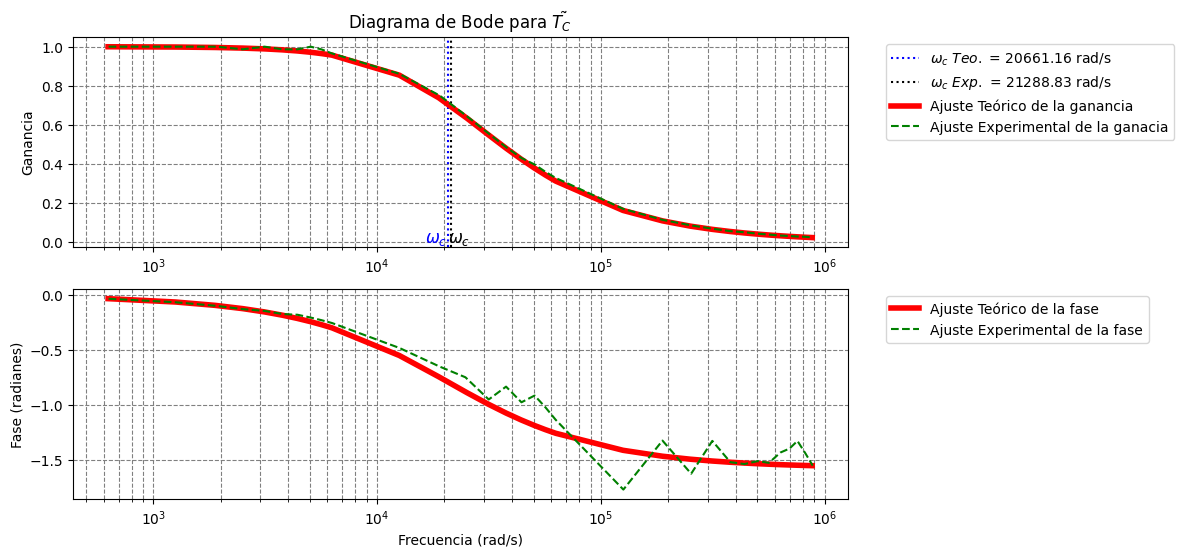

In [38]:
#---------------------------------------------------------------------------------------------------------------------------------
#Diagrama de Bode Experimental y Teórico de Tc
#---------------------------------------------------------------------------------------------------------------------------------


# Datos para el Experimental

GananciaExpC = []# Esta lista tomara el valor de la ganancia experimental.
for i in Tcexp: 
    #GananciaExpC.append(20 * math.log10(abs(i))) Esta formula se usaría para representar la ganancia en dB
    GananciaExpC.append(abs(i))


# Datos para el Teórico

GananciaTeoC = []# Esta lista tomara el valor de la ganancia teórica.
for i in Tcteo: 
    #GananciaTeoC.append(20 * math.log10(abs(i)))Esta formula se usaría para representar la ganancia en dB
    GananciaTeoC.append(abs(i))


# Graficar el diagrama de  Bode - Ganancia
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.axvline(1/RCteo, color='blue', linestyle=':', label=fr"$\omega_c\ Teo.$ = {1/RCteo:.2f} rad/s")
plt.text(1/RCteo, plt.gca().get_ylim()[1] * 0, r"$\omega_c$",color="blue", fontsize=12, ha="right",va='baseline')
plt.axvline(1/RCexp, color='black', linestyle=':', label=fr"$\omega_{{c}}\ Exp.$ = {1/RCexp:.2f} rad/s")
plt.text(1/RCteo, plt.gca().get_ylim()[1] * 0, r"$\omega_c$",color="black", fontsize=12, ha="left",va='baseline')
plt.semilogx(FrecuenciaAngularTeo, GananciaTeoC,label="Ajuste Teórico de la ganancia",color="red",lw=4)  # Gráfica semilogarítmica
plt.semilogx(FrecuenciaAngular, GananciaExpC,label='Ajuste Experimental de la ganacia',color='green',linestyle='--')  # Gráfica semilogarítmica
plt.title(r"Diagrama de Bode para $\~{T_C}$")
plt.ylabel("Ganancia")
plt.grid(True, which="both", linestyle="--", color="gray")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")


# Graficar el Bode - Fase (radianes)
plt.subplot(2, 1, 2)
plt.semilogx(FrecuenciaAngularTeo,FaseTeoC ,label="Ajuste Teórico de la fase",color="red",lw=4)  # Gráfica semilogarítmica
plt.semilogx(FrecuenciaAngular, FaseExpC,label='Ajuste Experimental de la fase',color='green',linestyle='--')  # Gráfica semilogarítmica
plt.ylabel("Fase (radianes)")
plt.xlabel("Frecuencia (rad/s)")
plt.grid(True, which="both", linestyle="--", color="gray")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

plt.show()
    

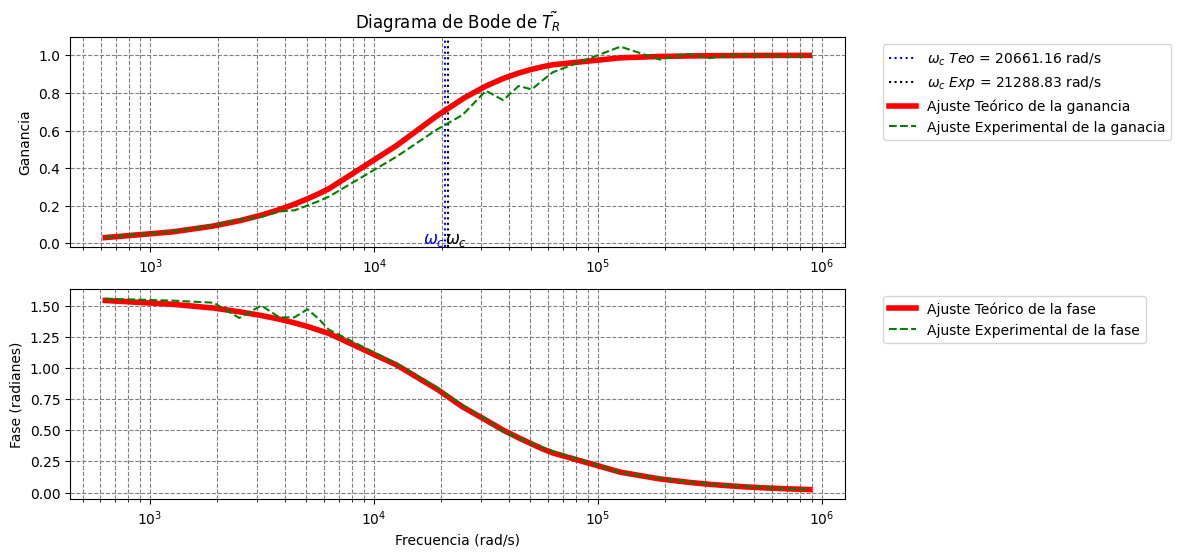

In [39]:
#---------------------------------------------------------------------------------------------------------------------------------
#Diagrama de Bode Experimental y Teórico de Tr
#---------------------------------------------------------------------------------------------------------------------------------


# Datos para el Experimental

GananciaExpR = []# Este lista tomara el valor de la ganancia experimental.
for i in Trexp: 
    #GananciaExpR.append(20 * math.log10(abs(i))) Esta formula se usaría para representar la ganancia en dB
    GananciaExpR.append(abs(i))

    
#Datos para el Teórico

GananciaTeoR = []# Este lista tomara el valor de la ganancia teórica
for i in Trteo: 
    #GananciaTeoR.append(20 * math.log10(abs(i))) Esta formula se usaría para representar la ganancia en dB
    GananciaTeoR.append(abs(i))


# Graficar el diagrama de  Bode - Ganancia
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.axvline(1/RCteo, color='blue', linestyle=':', label=fr"$\omega_c\ Teo$ = {1/RCteo:.2f} rad/s")
plt.text(1/RCteo, plt.gca().get_ylim()[1] * 0, r"$\omega_c$",color="blue", fontsize=12, ha="right",va='baseline')
plt.axvline(1/RCexp, color='black', linestyle=':', label=fr"$\omega_{{c}}\ Exp$ = {1/RCexp:.2f} rad/s")
plt.text(1/RCteo, plt.gca().get_ylim()[1] * 0, r"$\omega_c$",color="black", fontsize=12, ha="left",va='baseline')
plt.semilogx(FrecuenciaAngularTeo, GananciaTeoR,label="Ajuste Teórico de la ganancia",color="red",lw=4)  # Gráfica semilogarítmica
plt.semilogx(FrecuenciaAngular, GananciaExpR,label='Ajuste Experimental de la ganacia',color='green',linestyle='--')  # Gráfica semilogarítmica
plt.title(r"Diagrama de Bode de $\~{T_R}$")
plt.ylabel("Ganancia")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.grid(True, which="both", linestyle="--", color="gray")

# Graficar el Bode - Fase (radianes)
plt.subplot(2, 1, 2)
plt.semilogx(FrecuenciaAngular, FaseTeoR,label="Ajuste Teórico de la fase",color="red",lw=4)  # Gráfica semilogarítmica
plt.semilogx(FrecuenciaAngular, FaseExpR,label='Ajuste Experimental de la fase',color='green',linestyle='--')  # Gráfica semilogarítmica
plt.ylabel("Fase (radianes)")
plt.xlabel("Frecuencia (rad/s)")
plt.grid(True, which="both", linestyle="--", color="gray")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")


plt.show()

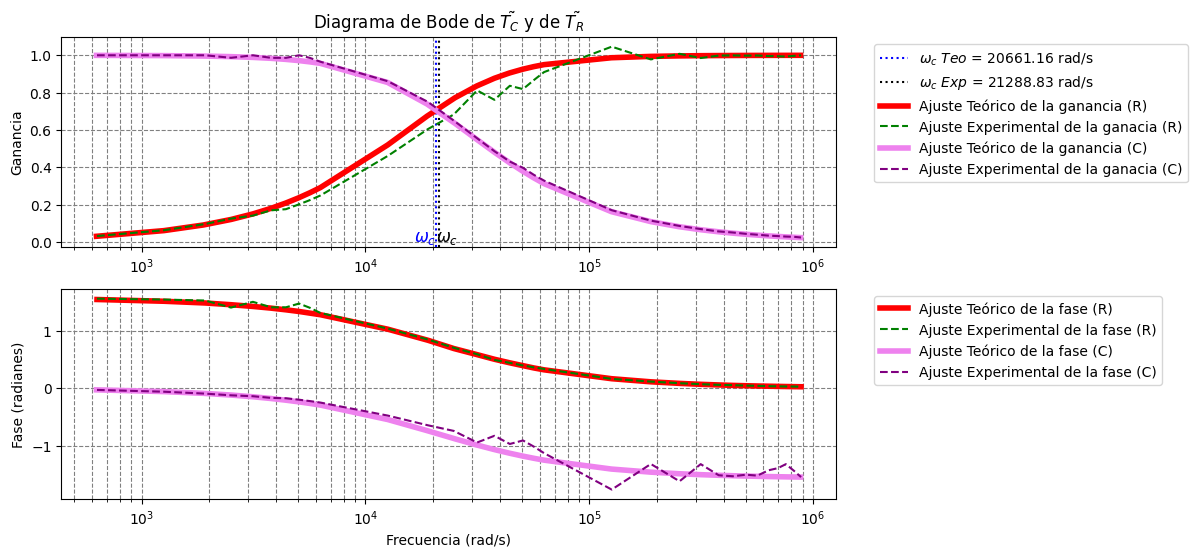

In [40]:
# Graficar el diagrama de Bode - Ganancia

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.axvline(1/RCteo, color='blue', linestyle=':', label=fr"$\omega_c\ Teo$ = {1/RCteo:.2f} rad/s")
plt.text(1/RCteo, plt.gca().get_ylim()[1] * 0, r"$\omega_c$",color="blue", fontsize=12, ha="right",va='baseline')
plt.axvline(1/RCexp, color='black', linestyle=':', label=fr"$\omega_{{c}}\ Exp$ = {1/RCexp:.2f} rad/s")
plt.text(1/RCteo, plt.gca().get_ylim()[1] * 0, r"$\omega_c$",color="black", fontsize=12, ha="left",va='baseline')
# Resistencia
plt.semilogx(FrecuenciaAngularTeo, GananciaTeoR,label="Ajuste Teórico de la ganancia (R)",color="red",lw=4)  # Gráfica semilogarítmica
plt.semilogx(FrecuenciaAngular, GananciaExpR,label='Ajuste Experimental de la ganacia (R)',color='green',linestyle='--')  # Gráfica semilogarítmica
# Condensador
plt.semilogx(FrecuenciaAngularTeo, GananciaTeoC,label="Ajuste Teórico de la ganancia (C)",color="violet",lw=4)  # Gráfica semilogarítmica
plt.semilogx(FrecuenciaAngular, GananciaExpC,label='Ajuste Experimental de la ganacia (C)',color='purple',linestyle='--')

plt.title(r"Diagrama de Bode de $\~{T_C}$ y de $\~{T_R}$")
plt.ylabel("Ganancia")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.grid(True, which="both", linestyle="--", color="gray")

# Graficar el Bode - Fase (grados)
plt.subplot(2, 1, 2)
# Resistencia
plt.semilogx(FrecuenciaAngular, FaseTeoR,label="Ajuste Teórico de la fase (R)",color="red",lw=4)  # Gráfica semilogarítmica
plt.semilogx(FrecuenciaAngular, FaseExpR,label='Ajuste Experimental de la fase (R)',color='green',linestyle='--')  # Gráfica semilogarítmica
# Condensador
plt.semilogx(FrecuenciaAngularTeo,FaseTeoC ,label="Ajuste Teórico de la fase (C)",color="violet",lw=4)  # Gráfica semilogarítmica
plt.semilogx(FrecuenciaAngular, FaseExpC,label='Ajuste Experimental de la fase (C)',color='purple',linestyle='--')

plt.ylabel("Fase (radianes)")
plt.xlabel("Frecuencia (rad/s)")
plt.grid(True, which="both", linestyle="--", color="gray")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

plt.show()

---
<h1 style="text-align: center;">[P3.C5]</h1>

---

Tras obtener los diagramas podemos concluir que el circuito funciona como un filtro. Como se observa, el condesador funciona como un filtro pasabaja, mientras que la resistencia funciona como una filtro pasaalta.

Para verificar esto además del diagrama hemos trabajado sobre las ecuaciones de $\~{T_R}$ y $\~{T_C}$, mostradas en P3C1, para ver si se asemejaban a algún filtro:

$\~{T_C}\ =\ \dfrac{1}{1+ j\omega RC}\ =\ \dfrac{\dfrac{1}{R\ C}}{\dfrac{1}{R\ C} + j\omega}\ =\boxed{\dfrac{1}{RC}\ =
 \omega_C}\ = \dfrac{\omega_c}{\omega_c + s} $ que es la ecuación de un filtro pasabaja

$\~{T_R}\ =\ \dfrac{j\omega RC}{1+ j\omega RC}\ =\ \dfrac{j\omega}{\dfrac{1}{R\ C} + j\omega}\ =\boxed{\dfrac{1}{RC}\ =
 \omega_c}\ = \dfrac{s}{\omega_c + s} $ que es la ecuación de un filtro pasaalta


---
<h1 style="text-align: center;">[P3.C6]</h1>

---

Conociendo la relación entre el voltaje de la resistencia y el del circuito y condensador, obtenemos la ecuación
$\overline{V}_R = \overline{V}_S - \overline{V}_c$ <br>
Además, sabemos que $\overline{V}_C = \dfrac{\overline{V}_S}{j\omega RC+1}$. Podemos obtener en consecuencia $V_R$ en función de $V_S$:

 $\overline{V}_R = \overline{V}_S\left(\dfrac{j\omega RC}{j \omega RC + 1}\right)$ <br>

### Altas frecuencias

Para altas frecuencias, es decir, en caso $\omega RC \gg 1$, o lo que es lo mismo $\omega RC \rightarrow \infty$, obtenemos lo siguiente <br> <br>
$\overline{V}_R \medspace (\omega RC \rightarrow \infty) \rightarrow \overline{V}_S$ <br> <br>

Para frecuencias altas el condensador tiende a actuar casi como un cortocircuito porque su voltaje tiende a no variar respecto del introducido. Por tanto, el voltaje de salida será el de la resistencia ya que en el condensador casi no varía (y el de la resistencia tiende a caer $\overline{V}_S$, como nos indica el limite). Esto significa que el condensador tiene un comportamiento derivador.

Para altas frecuencias en los terminales del condensador observamos que apenas cambia la señal respecto a la de entrada porque funciona como cortocircuito.

### Bajas frecuencias
Ahora para frecuencias cercanas a 0, escrito matemáticamente como: $\omega RC \ll 1$ o también $\omega RC \rightarrow 0$, podemos calcular: <br> <br>

$\overline{V}_R \medspace (\omega RC \rightarrow 0) \rightarrow 0$ <br> <br>

Es decir, para bajas frecuencias el condensador actúa como un abierto, por tanto, la mayor parte de la corriente cae en el condensador, que será el voltaje de salida. Esto es un comportamiento integrador.

Para bajas frecuencias en los terminales de la resistencia observamos tambien pulsos cuadrados porque tiende a variar muy poco el voltaje en la misma (tiende a 0)



---
<h1 style="text-align: center;">[P3.C7]</h1>

---

Ahora pasaremos a ver representados los comportamientos del condensador a Alta frecuencia y la Resistencia a Baja frecuencia. En las imágenes observamos la señal amarilla, ${v}_S (t)$, mostrada como un pulso cuadrado. Esta señal podemos definirla en este caso según la siguiente función donde N es el conjunto de naturales:

$ {v_S (t)} = \left\{ \begin{array}{lr} {   V_m}   & {t_{2n} < t < t_{2n+1}}& {2nT=[t_{2n} , t_{2n+1}]}& n \in N\\ {-V_m} & {t_{2n+1} < t < t_{2n+2}}& {(2n+1)T=[t_{2n+1} , t_{2n+2}]}& n \in N \end{array} \right. $

Es decir, alternando entre periodos T, $v_S (t)$ tomará los valores de $\pm V_m$. Supondremos también, una señal cuadrada perfecta.

### Alta Frecuencia en Condensador

<div style="text-align: center;">
    <img src="https://i.pinimg.com/736x/45/ab/3f/45ab3f79e1f7eed92ea4318c2c0a3635.jpg" alt="Alta Frecuencia Condensador" style="width: 40%;"/>
</div>

En este caso vemos que para Alta frecuencia en un Condensador y según lo explicado en [P3.C6] seguiría un comportamiento integrador. Dejando la función como:
 $ {v_C (t)} = \left\{ \begin{array}{lr} {V_m t}   & {t_{2n} < t < t_{2n+1}}& {2nT=[t_{2n} , t_{2n+1}]}& n \in N\\ {-V_m t} & {t_{2n+1} < t < t_{2n+2}}& {(2n+1)T=[t_{2n+1} , t_{2n+2}]}& n \in N \end{array} \right. $

Como podemos ver, para distintos periodos obtendrémos funciones con pendientes de signo contrario que es lo que observamos en la señal azul que corresponde con la tensión del codensador.

### Baja Frecuencia Resistencia

<div style="text-align: center;">
    <img src="https://i.pinimg.com/736x/75/ea/82/75ea82dc01a3b65b32e70cc7c96fb9e9.jpg" alt="Baja Frecuencia Resistor" style="width: 40%;"/>
</div>


En este caso vemos que para Baja frecuencia en una Resistencia y según lo explicado en [P3.C6] seguiría un comportamiento derivador. Dejando la función como:
 $ {v_R (t)} = \left\{ \begin{array}{lr} {0}   & {t_{2n} < t < t_{2n+1}}& {2nT=[t_{2n} , t_{2n+1}]}& n \in N\\ {0} & {t_{2n+1} < t < t_{2n+2}}& {(2n+1)T=[t_{2n+1} , t_{2n+2}]}& n \in N \end{array} \right. $

Como podemos ver, para distintos periodos obtendremos una una única función constantemente 0 que es lo que observamos en la señal azul que corresponde con la tensión de la resistencia.